<a href="https://colab.research.google.com/github/Andhi1710/python/blob/main/(Andhi_Hamzah)_BikeShare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Bikeshares

a) Find out what percentage of bikes are
returned to its initial location?

b) How many bikeshare trips usually
visit more than just start/end points,
but visited some other points before
the end of the day?

# Data Import

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andhihamzah","key":"b3afadbe6663a10cdcd7032c54f70376"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d jackywang529/toronto-bikeshare-data

 98% 57.0M/58.4M [00:03<00:00, 11.5MB/s]
100% 58.4M/58.4M [00:03<00:00, 19.6MB/s]


In [7]:
!ls

drive  kaggle.json  sample_data  toronto-bikeshare-data.zip


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('toronto-bikeshare-data.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [10]:
#memasukkan data 
import pandas as pd
import numpy as np
df1 = pd.read_csv("/content/files/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv")
df2 = pd.read_csv("/content/files/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv")
df3 = pd.read_csv("/content/files/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv")
df4 = pd.read_csv("/content/files/bikeshare2018/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv")
df = df1.copy()
df = df.append([df2, df3, df4], sort=False)
df.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


In [11]:
#melihat statistik deskriptif
df.describe(include='all')

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
count,7.142360e+05,714236.000000,714236.000000,714236,714236,714236,714236.000000,714236,714236
unique,NaN,NaN,NaN,69859,270,69634,NaN,270,2
top,NaN,NaN,NaN,3/28/2018 8:52,Sherbourne St / Wellesley St E,2/27/2018 8:55,NaN,Union Station,Annual Member
freq,NaN,NaN,NaN,76,11284,96,NaN,16192,673236
mean,2.497156e+06,696.457479,7111.200931,NaN,NaN,NaN,7109.080192,NaN,NaN
std,6.296187e+04,907.875489,88.876208,NaN,NaN,NaN,88.199105,NaN,NaN
min,2.383648e+06,60.000000,7000.000000,NaN,NaN,NaN,7000.000000,NaN,NaN
25%,2.443541e+06,365.000000,7034.000000,NaN,NaN,NaN,7034.000000,NaN,NaN
50%,2.498112e+06,555.000000,7077.000000,NaN,NaN,NaN,7076.000000,NaN,NaN
75%,2.551270e+06,837.000000,7180.000000,NaN,NaN,NaN,7177.000000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178559 entries, 0 to 178558
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   trip_id                178559 non-null  int64 
 1   trip_duration_seconds  178559 non-null  int64 
 2   from_station_id        178559 non-null  int64 
 3   trip_start_time        178559 non-null  object
 4   from_station_name      178559 non-null  object
 5   trip_stop_time         178559 non-null  object
 6   to_station_id          178559 non-null  int64 
 7   to_station_name        178559 non-null  object
 8   user_type              178559 non-null  object
dtypes: int64(4), object(5)
memory usage: 12.3+ MB


In [ ]:
feature_numerik = [col for col in df.columns if df[col].dtype!='object'] 
feature_kategorik = [col for col in df.columns if df[col].dtype=='object']
print('feature numerik antara lain : ', feature_numerik)
print()
print('feature kategorik antara lain : ', feature_kategorik)

feature numerik antara lain :  ['trip_id', 'trip_duration_seconds', 'from_station_id', 'to_station_id']

feature kategorik antara lain :  ['trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_name', 'user_type']


# Data Preparation

In [ ]:
#@title Dealing with missing values
missing_data = df.isnull()
missing_data.head(10)

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

trip_id
False    178559
Name: trip_id, dtype: int64

trip_duration_seconds
False    178559
Name: trip_duration_seconds, dtype: int64

from_station_id
False    178559
Name: from_station_id, dtype: int64

trip_start_time
False    178559
Name: trip_start_time, dtype: int64

from_station_name
False    178559
Name: from_station_name, dtype: int64

trip_stop_time
False    178559
Name: trip_stop_time, dtype: int64

to_station_id
False    178559
Name: to_station_id, dtype: int64

to_station_name
False    178559
Name: to_station_name, dtype: int64

user_type
False    178559
Name: user_type, dtype: int64



In [ ]:
df= pd.read_csv(path,nrows=10)
df.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,10.000,10.000000,10.00000,10.000000
mean,2383652.700,557.300000,7103.00000,7112.700000
std,3.335,346.858937,90.62499,92.214786
min,2383648.000,180.000000,7004.00000,7020.000000
25%,2383650.250,246.250000,7026.75000,7029.250000
50%,2383652.500,509.000000,7062.00000,7095.000000
75%,2383654.750,748.750000,7194.50000,7187.250000
max,2383658.000,1138.000000,7235.00000,7275.000000


In [ ]:
kolum = ["trip_id","trip_duration_seconds","from_station_id","to_station_id"]
df= pd.read_csv(path, usecols=kolum)

In [ ]:
df.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,1.785590e+05,178559.000000,178559.000000,178559.000000
mean,2.497156e+06,696.457479,7111.200931,7109.080192
std,6.296201e+04,907.877396,88.876395,88.199290
min,2.383648e+06,60.000000,7000.000000,7000.000000
25%,2.443544e+06,365.000000,7034.000000,7034.000000
50%,2.498112e+06,555.000000,7077.000000,7076.000000
75%,2.551270e+06,837.000000,7180.000000,7177.000000
max,2.605023e+06,55077.000000,7289.000000,7289.000000


In [ ]:
df.dtypes

trip_id                  int64
trip_duration_seconds    int64
from_station_id          int64
to_station_id            int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178559 entries, 0 to 178558
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   trip_id                178559 non-null  int64
 1   trip_duration_seconds  178559 non-null  int64
 2   from_station_id        178559 non-null  int64
 3   to_station_id          178559 non-null  int64
dtypes: int64(4)
memory usage: 5.4 MB


In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(30)

,trip_id,trip_duration_seconds,from_station_id,to_station_id
0,2383648,393,7018,7176
1,2383649,625,7184,7191
2,2383650,233,7235,7021
3,2383651,1138,7202,7020
4,2383652,703,7004,7060
5,2383653,1026,7078,7130
6,2383654,274,7021,7033
7,2383655,764,7046,7275
8,2383657,237,7044,7028
9,2383658,180,7198,7193


In [ ]:
missing_data = df.isnull()
missing_data.head(30)

,trip_id,trip_duration_seconds,from_station_id,to_station_id
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [ ]:
#@title Data Normalisasi
df["trip_id"] = df["trip_id"].astype("float")
df["trip_duration_seconds"] = df["trip_duration_seconds"].astype("float")
df["from_station_id"] = df["from_station_id"].astype("float")
df["to_station_id"] = df["to_station_id"].astype("float")

In [ ]:
df["trip_id"] = df["trip_id"]/df["trip_id"].max()
df["trip_duration_seconds"] = df["trip_duration_seconds"]/df["trip_duration_seconds"].max()
df["from_station_id"] = df["from_station_id"]/df["from_station_id"].max()
df["to_station_id"] = df["to_station_id"]/df["to_station_id"].max()

In [ ]:
df.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,178559.000000,178559.000000,178559.000000,178559.000000
mean,0.958593,0.012645,0.975607,0.975316
std,0.024169,0.016484,0.012193,0.012100
min,0.915020,0.001089,0.960351,0.960351
25%,0.938012,0.006627,0.965016,0.965016
50%,0.958960,0.010077,0.970915,0.970778
75%,0.979365,0.015197,0.985046,0.984634
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178559 entries, 0 to 178558
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trip_id                178559 non-null  float64
 1   trip_duration_seconds  178559 non-null  float64
 2   from_station_id        178559 non-null  float64
 3   to_station_id          178559 non-null  float64
dtypes: float64(4)
memory usage: 5.4 MB


In [ ]:
df["trip_id"] = (df["trip_id"]-df["trip_id"].min())/(df["trip_id"].max()-df["trip_id"].min())
df["trip_duration_seconds"] = (df["trip_duration_seconds"]-df["trip_duration_seconds"].min())/(df["trip_duration_seconds"].max()-df["trip_duration_seconds"].min())
df["from_station_id"] = (df["from_station_id"]-df["from_station_id"].min())/(df["from_station_id"].max()-df["from_station_id"].min())
df["to_station_id"] = (df["to_station_id"]-df["to_station_id"].min())/(df["to_station_id"].max()-df["to_station_id"].min())

In [ ]:
df.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,178559.000000,178559.000000,178559.000000,178559.000000
mean,0.512740,0.011568,0.384778,0.377440
std,0.284413,0.016502,0.307531,0.305188
min,0.000000,0.000000,0.000000,0.000000
25%,0.270561,0.005544,0.117647,0.117647
50%,0.517059,0.008997,0.266436,0.262976
75%,0.757184,0.014123,0.622837,0.612457
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df["trip_id"] = (df["trip_id"]-df["trip_id"].mean())/df["trip_id"].std()
df["trip_duration_seconds"] = (df["trip_duration_seconds"]-df["trip_duration_seconds"].mean())/df["trip_duration_seconds"].std()
df["from_station_id"] = (df["from_station_id"]-df["from_station_id"].mean())/df["from_station_id"].std()
df["to_station_id"] = (df["to_station_id"]-df["to_station_id"].mean())/df["to_station_id"].std()

In [ ]:
df.describe()

,trip_id,trip_duration_seconds,from_station_id,to_station_id
count,1.785590e+05,1.785590e+05,1.785590e+05,1.785590e+05
mean,-9.045657e-16,2.621518e-15,1.099599e-13,1.327794e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.802799e+00,-7.010390e-01,-1.251186e+00,-1.236747e+00
25%,-8.515029e-01,-3.650906e-01,-8.686326e-01,-8.512562e-01
50%,1.518644e-02,-1.558112e-01,-3.848146e-01,-3.750619e-01
75%,8.594654e-01,1.548034e-01,7.740983e-01,7.700720e-01
max,1.713210e+00,5.989855e+01,2.000521e+00,2.039924e+00


In [ ]:
#@title Binning
bins = np.linspace(min(df["trip_id"]), max(df["trip_id"]), 4)
bins

array([-1.80279881, -0.63079572,  0.54120737,  1.71321046])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
df['trip_id-binned'] = pd.cut(df['trip_id'], bins, labels=group_names, include_lowest=True )
df[['trip_id','trip_id-binned']].head(50)

,trip_id,trip_id-binned
0,-1.802799,Low
1,-1.802783,Low
2,-1.802767,Low
3,-1.802751,Low
4,-1.802735,Low
5,-1.802719,Low
6,-1.802704,Low
7,-1.802688,Low
8,-1.802656,Low
9,-1.802640,Low


# Exploratory Data Analysis

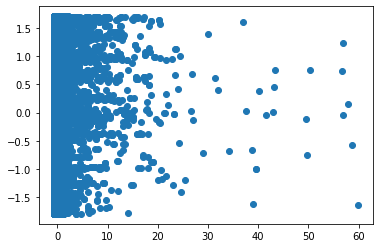

In [ ]:
#@title Scatter Plot
import matplotlib.pyplot as plt
y=df["trip_id"]
x=df["trip_duration_seconds"]
plt.scatter(x,y)

(0.0, 62.9285328516449)

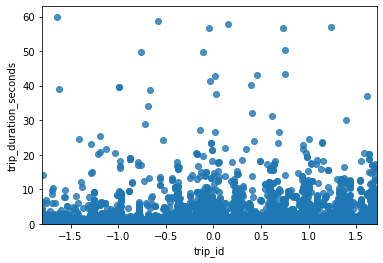

In [ ]:
#@title Correlation
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="trip_id", y="trip_duration_seconds", data=df)
plt.ylim(0,)

# Data Visualisation

Text(0.5, 1.0, 'trip_id bins')

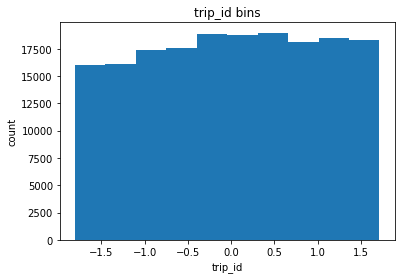

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["trip_id"])

# set x/y labels and plot title
plt.pyplot.xlabel("trip_id")
plt.pyplot.ylabel("count")
plt.pyplot.title("trip_id bins")

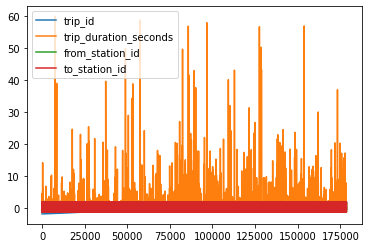

In [ ]:
df.plot(kind="line")

In [ ]:
df.head()

,trip_id,trip_duration_seconds,from_station_id,to_station_id,trip_id-binned
0,-1.802799,-0.334249,-1.048658,0.758734,Low
1,-1.802783,-0.078708,0.819105,0.928803,Low
2,-1.802767,-0.510485,1.392935,-0.998650,Low
3,-1.802751,0.486346,1.021633,-1.009988,Low
4,-1.802735,0.007206,-1.206180,-0.556469,Low


In [ ]:
df["trip_id"].value_counts()

-0.002253    1
 0.671122    1
 1.461551    1
-1.671084    1
 0.972923    1
            ..
 0.615072    1
-0.277498    1
 0.283094    1
 0.706985    1
-1.286948    1
Name: trip_id, Length: 178559, dtype: int64

Text(0.5, 1.0, 'trip_id bins')

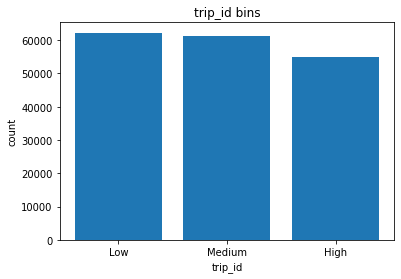

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["trip_id-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("trip_id")
plt.pyplot.ylabel("count")
plt.pyplot.title("trip_id bins")

In [ ]:
#@title Area Plots
df.sort_values(['trip_duration_seconds'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5['trip_id'].transpose() 

df_top5.head()

7750     -1.641686
57543    -0.578219
96682     0.151697
153774    1.237336
85801    -0.047804
Name: trip_id, dtype: float64

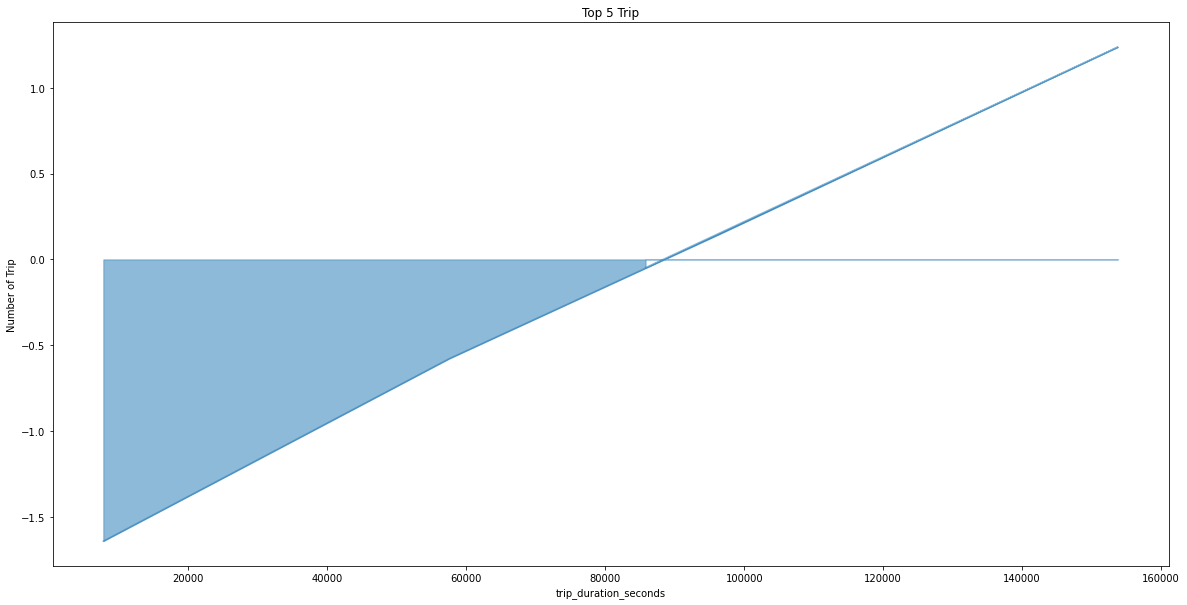

In [ ]:
import matplotlib.pyplot as plt
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Top 5 Trip')
plt.ylabel('Number of Trip')
plt.xlabel('trip_duration_seconds')

plt.show()

Text(0.5, 1.0, 'trip_id bins')

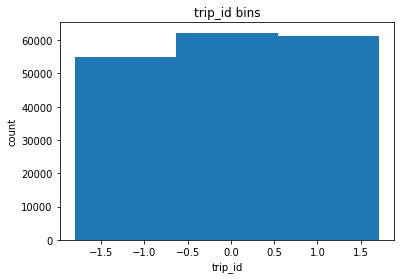

In [ ]:
#@title Histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["trip_id"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("trip_id")
plt.pyplot.ylabel("count")
plt.pyplot.title("trip_id bins")

In [ ]:
df.head()

,trip_id,trip_duration_seconds,from_station_id,to_station_id,trip_id-binned
7750,-1.641686,59.898553,-0.587343,1.575067,Low
57543,-0.578219,58.678124,-0.092273,-0.511117,Medium
96682,0.151697,57.874051,-1.082413,0.441271,Medium
153774,1.237336,56.878322,-0.913639,-1.089353,High
85801,-0.047804,56.826553,-0.553588,-0.567807,Medium


In [ ]:
df.columns

Index(['trip_id', 'trip_duration_seconds', 'from_station_id', 'to_station_id',
       'trip_id-binned'],
      dtype='object')

In [ ]:
df.isnull().sum()

trip_id                  0
trip_duration_seconds    0
from_station_id          0
to_station_id            0
trip_id-binned           0
dtype: int64

# Specialized Visualization Tools

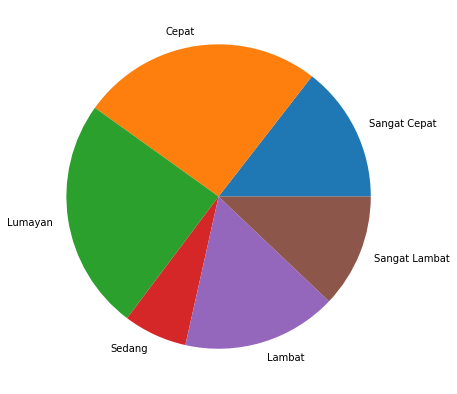

In [ ]:
#@title Pie Charts
from matplotlib import pyplot as plt 
trip_duration_seconds = ['Sangat Cepat', 'Cepat', 'Lumayan', 
        'Sedang', 'Lambat', 'Sangat Lambat'] 
  
trip_id = [300, 530, 510, 140, 340, 250] 
  
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(trip_id, labels = trip_duration_seconds) 

# show plot 
plt.show() 

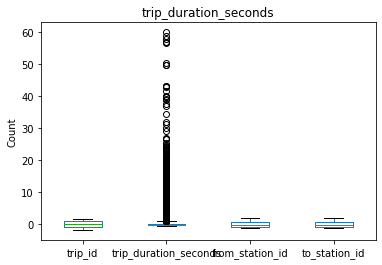

In [ ]:
#@title Box Plots
import matplotlib.pyplot as plt
df.plot(kind='box')
plt.ylabel("Count")
plt.title("trip_duration_seconds")
plt.show()

# Advanced Visualization Tools

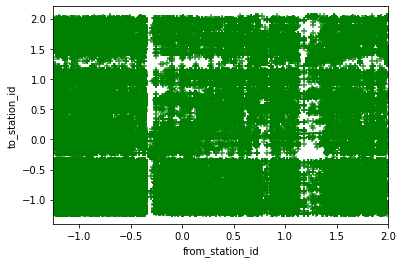

In [ ]:
#@title Regression Plots with Seaborn
import seaborn as sns
ax = sns.regplot(x='from_station_id', y='to_station_id', data=df, marker='+', color='green')